# Notebook imports

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer, HashingVectorizer
from sklearn.decomposition import TruncatedSVD, NMF, LatentDirichletAllocation
from sklearn.preprocessing import MaxAbsScaler

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

%matplotlib inline

# Working With Text Data - Bag Of Words

In [27]:
got = ['Winter is coming', 'Chaos isnt a pit. Chaos is a ladder']

vector = CountVectorizer()
vector.fit(got)
print(vector.get_feature_names_out())
vector.transform(got)

['chaos' 'coming' 'is' 'isnt' 'ladder' 'pit' 'winter']


<2x7 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [28]:
print(vector.transform(got))

  (0, 1)	1
  (0, 2)	1
  (0, 6)	1
  (1, 0)	2
  (1, 2)	1
  (1, 3)	1
  (1, 4)	1
  (1, 5)	1


In [29]:
vector.transform(got).toarray()

array([[0, 1, 1, 0, 0, 0, 1],
       [2, 0, 1, 1, 1, 1, 0]], dtype=int64)

In [30]:
vector_transformed = vector.transform(got)
print(vector.inverse_transform(vector_transformed[0]))
print(vector.inverse_transform(vector_transformed[1]))

[array(['coming', 'is', 'winter'], dtype='<U6')]
[array(['chaos', 'is', 'isnt', 'ladder', 'pit'], dtype='<U6')]


# Working With Text Data - Bag Of Words - Movie Review

In [31]:
imdb_data = pd.read_csv('./Data/IMDB Dataset.csv')
imdb_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [32]:
imdb_data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [33]:
reviews = list(imdb_data['review'])
reviews = [review.replace('<br />', '') for review in reviews]
sentiment = imdb_data['sentiment']
reviews[1]

'A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

In [34]:
dev_text, test_text, dev_y, test_y = train_test_split(reviews, sentiment, test_size=0.2, random_state=42)

print(dev_y.value_counts())
print('-----------------------')
print(test_y.value_counts())

sentiment
negative    20039
positive    19961
Name: count, dtype: int64
-----------------------
sentiment
positive    5039
negative    4961
Name: count, dtype: int64


In [11]:
vector = CountVectorizer()
dev_X = vector.fit_transform(dev_text)
test_X = vector.transform(test_text)
dev_X

<40000x94886 sparse matrix of type '<class 'numpy.int64'>'
	with 5432493 stored elements in Compressed Sparse Row format>

In [12]:
test_X

<10000x94886 sparse matrix of type '<class 'numpy.int64'>'
	with 1354958 stored elements in Compressed Sparse Row format>

In [12]:
feature_names = vector.get_feature_names_out()
print(feature_names[:10])
print(feature_names[10000:10020])

['00' '000' '00000000000' '00000001' '00001' '00015' '000dm' '000s' '001'
 '003830']
['blayde' 'blaylak' 'blaylock' 'blaze' 'blazed' 'blazer' 'blazers'
 'blazes' 'blazing' 'blaznee' 'bleach' 'bleached' 'bleachers' 'bleaching'
 'bleah' 'bleak' 'bleaked' 'bleaker' 'bleakest' 'bleakly']


In [14]:
lr = LogisticRegressionCV(max_iter=2000).fit(dev_X, dev_y)
lr.score(test_X, test_y)

0.9007

In [69]:
feature_names = vector.get_feature_names_out()
feature_coef = lr.coef_[0]
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': feature_coef})
sorted_coefficients = coefficients_df.sort_values(by='Coefficient',)

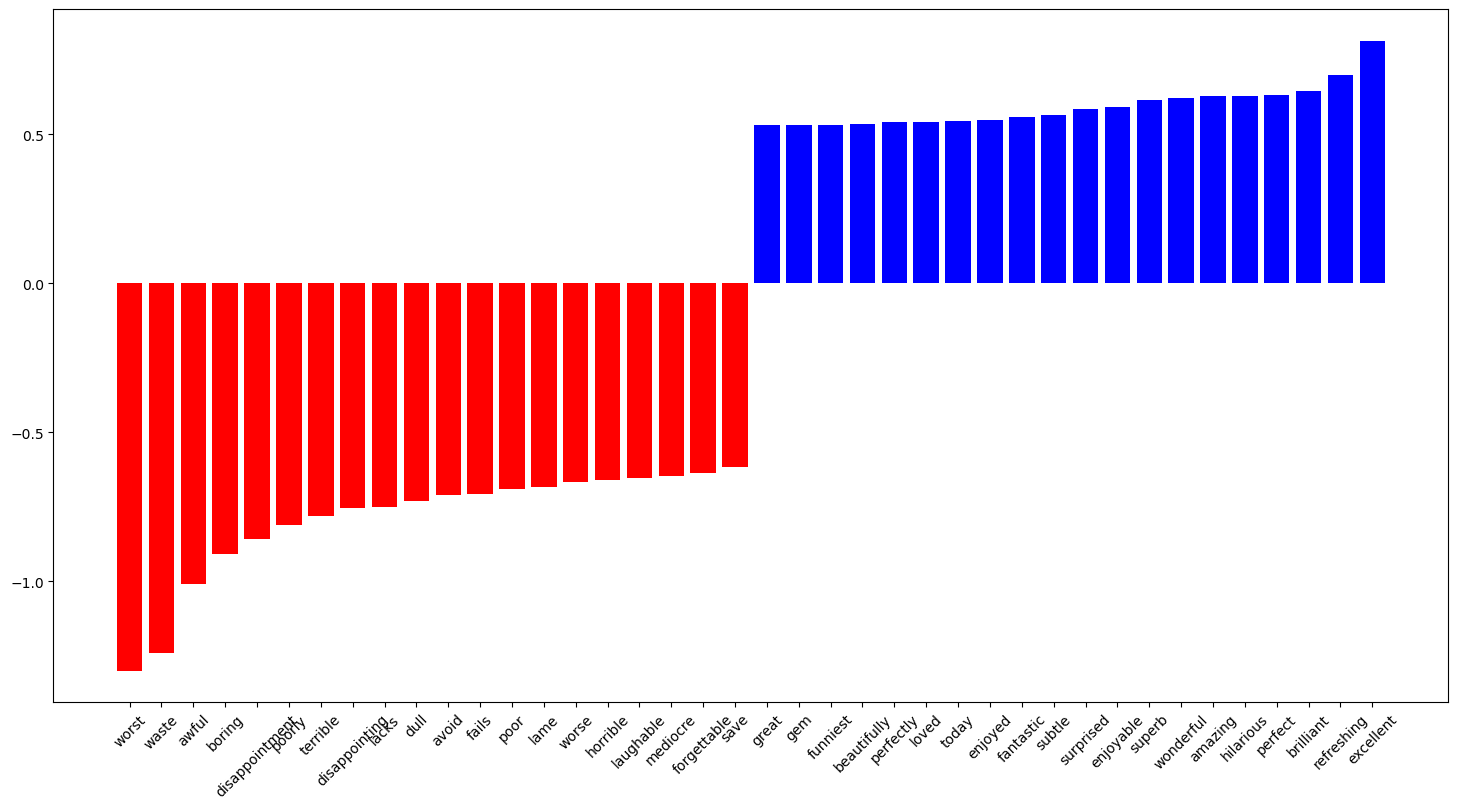

In [98]:
top_features = 20

plt.figure(figsize=(18, 9))
plt.bar(range(top_features), sorted_coefficients['Coefficient'][:top_features], color='red', label='Negative')
plt.bar(range(top_features, top_features*2), sorted_coefficients['Coefficient'][-top_features:], color='blue', label='Positive')

plt.xticks(range(top_features*2), 
           sorted_coefficients['Feature'][:top_features].tolist() + sorted_coefficients['Feature'][-top_features:].tolist(), 
           rotation=45)
plt.show()

# Working With Text Data - Stop Words

In [99]:
print(len(ENGLISH_STOP_WORDS))
print(ENGLISH_STOP_WORDS)

318
frozenset({'anywhere', 'co', 'therein', 'whose', 'yet', 'by', 'now', 'of', 'rather', 'elsewhere', 'the', 'made', 'cannot', 'forty', 'six', 'within', 're', 'has', 'moreover', 'thereafter', 'i', 'been', 'nothing', 'over', 'seem', 'empty', 'another', 'becoming', 'not', 'nevertheless', 'such', 'his', 'other', 'hers', 'very', 'behind', 'still', 'please', 'thick', 'due', 'up', 'anyway', 'was', 'anyone', 'whereupon', 'none', 'someone', 'without', 'they', 'besides', 'latterly', 'to', 'how', 'toward', 'whereafter', 'put', 'enough', 'but', 'etc', 'perhaps', 'become', 'former', 'five', 'everyone', 'these', 'after', 'beforehand', 'your', 'meanwhile', 'everywhere', 'take', 'have', 'becomes', 'seems', 'thin', 'ever', 'are', 'she', 'mostly', 'nor', 'although', 'himself', 'more', 'from', 'own', 'un', 'them', 'beyond', 'twenty', 'twelve', 'should', 'part', 'even', 'across', 'only', 'however', 'whenever', 'and', 'onto', 'few', 'per', 'fifty', 'there', 'never', 'any', 'our', 'yourself', 'somehow', 'm

In [100]:
vector_stop_words = CountVectorizer(stop_words='english')
dev_X = vector_stop_words.fit_transform(dev_text)
test_X = vector_stop_words.transform(test_text)
dev_X

<40000x94575 sparse matrix of type '<class 'numpy.int64'>'
	with 3520297 stored elements in Compressed Sparse Row format>

In [101]:
lr = LogisticRegressionCV(max_iter=2000).fit(dev_X, dev_y)
lr.score(test_X, test_y)

0.8919

# Working With Text Data - Infrequent Words

In [102]:
vector_infrequent_words = CountVectorizer(min_df=4)
dev_X = vector_infrequent_words.fit_transform(dev_text)
test_X = vector_infrequent_words.transform(test_text)
print(dev_X.shape)

(40000, 37699)


In [103]:
lr = LogisticRegressionCV(max_iter=2000).fit(dev_X, dev_y)
lr.score(test_X, test_y)

0.9005

# Working With Text Data - Stemming

In [104]:
porter = PorterStemmer()
def stemSentence(sentence):
    token_words = word_tokenize(sentence)
    stem_sentence = [porter.stem(word) for word in token_words]
    return " ".join(stem_sentence)

In [105]:
reviews_stem = [stemSentence(review) for review in reviews]

In [106]:
reviews_stem[0]

"one of the other review ha mention that after watch just 1 oz episod you 'll be hook . they are right , as thi is exactli what happen with me.th first thing that struck me about oz wa it brutal and unflinch scene of violenc , which set in right from the word go . trust me , thi is not a show for the faint heart or timid . thi show pull no punch with regard to drug , sex or violenc . it is hardcor , in the classic use of the word.it is call oz as that is the nicknam given to the oswald maximum secur state penitentari . it focus mainli on emerald citi , an experiment section of the prison where all the cell have glass front and face inward , so privaci is not high on the agenda . em citi is home to mani .. aryan , muslim , gangsta , latino , christian , italian , irish and more .... so scuffl , death stare , dodgi deal and shadi agreement are never far away.i would say the main appeal of the show is due to the fact that it goe where other show would n't dare . forget pretti pictur paint

In [107]:
reviews[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

In [108]:
dev_text, test_text, dev_y, test_y = train_test_split(reviews_stem, sentiment, test_size=0.2, random_state=42)

print(dev_y.value_counts())
print('-----------------------')
print(test_y.value_counts())

negative    20039
positive    19961
Name: sentiment, dtype: int64
-----------------------
positive    5039
negative    4961
Name: sentiment, dtype: int64


In [109]:
vector = CountVectorizer()
dev_X = vector.fit_transform(dev_text)
test_X = vector.transform(test_text)
dev_X

<40000x75073 sparse matrix of type '<class 'numpy.int64'>'
	with 5267993 stored elements in Compressed Sparse Row format>

In [110]:
lr = LogisticRegressionCV(max_iter=2000).fit(dev_X, dev_y)
lr.score(test_X, test_y)

0.8933

In [111]:
vector_stop_words = CountVectorizer(stop_words='english')
dev_X = vector_stop_words.fit_transform(dev_text)
test_X = vector_stop_words.transform(test_text)
dev_X

<40000x74778 sparse matrix of type '<class 'numpy.int64'>'
	with 3580819 stored elements in Compressed Sparse Row format>

In [112]:
lr = LogisticRegressionCV(max_iter=2000).fit(dev_X, dev_y)
lr.score(test_X, test_y)

0.8856

# Working With Text Data - Lemmatization

In [117]:
lemmatizer = WordNetLemmatizer()
def lemma_sentence(sentence):
    token_words = word_tokenize(sentence)
    stem_sentence = [lemmatizer.lemmatize(word) for word in token_words]
    return " ".join(stem_sentence)

In [118]:
reviews_lemma = [lemma_sentence(review) for review in reviews]

In [119]:
reviews_lemma[0]

"One of the other reviewer ha mentioned that after watching just 1 Oz episode you 'll be hooked . They are right , a this is exactly what happened with me.The first thing that struck me about Oz wa it brutality and unflinching scene of violence , which set in right from the word GO . Trust me , this is not a show for the faint hearted or timid . This show pull no punch with regard to drug , sex or violence . Its is hardcore , in the classic use of the word.It is called OZ a that is the nickname given to the Oswald Maximum Security State Penitentary . It focus mainly on Emerald City , an experimental section of the prison where all the cell have glass front and face inwards , so privacy is not high on the agenda . Em City is home to many .. Aryans , Muslims , gangsta , Latinos , Christians , Italians , Irish and more .... so scuffle , death stare , dodgy dealing and shady agreement are never far away.I would say the main appeal of the show is due to the fact that it go where other show 

In [120]:
reviews[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

In [121]:
dev_text, test_text, dev_y, test_y = train_test_split(reviews_lemma, sentiment, test_size=0.2, random_state=42)

print(dev_y.value_counts())
print('-----------------------')
print(test_y.value_counts())

negative    20039
positive    19961
Name: sentiment, dtype: int64
-----------------------
positive    5039
negative    4961
Name: sentiment, dtype: int64


In [122]:
vector = CountVectorizer()
dev_X = vector.fit_transform(dev_text)
test_X = vector.transform(test_text)
dev_X.shape

(40000, 90444)

In [123]:
lr = LogisticRegressionCV(max_iter=2000).fit(dev_X, dev_y)
lr.score(test_X, test_y)

0.8992

In [22]:
vector_stop_words = CountVectorizer(stop_words='english')
dev_X = vector_stop_words.fit_transform(dev_text)
test_X = vector_stop_words.transform(test_text)
dev_X.shape

(40000, 94575)

In [125]:
lr = LogisticRegressionCV(max_iter=2000).fit(dev_X, dev_y)
lr.score(test_X, test_y)

0.8881

# Working With Text Data - TF-IDF

In [126]:
dev_text, test_text, dev_y, test_y = train_test_split(reviews, sentiment, test_size=0.2, random_state=42)

print(dev_y.value_counts())
print('-----------------------')
print(test_y.value_counts())
vector = TfidfVectorizer()
dev_X = vector.fit_transform(dev_text)
test_X = vector.transform(test_text)
lr = LogisticRegressionCV(max_iter=2000).fit(dev_X, dev_y)
lr.score(test_X, test_y)

negative    20039
positive    19961
Name: sentiment, dtype: int64
-----------------------
positive    5039
negative    4961
Name: sentiment, dtype: int64


0.906

In [127]:
dev_X.shape

(40000, 94886)

In [128]:
dev_text, test_text, dev_y, test_y = train_test_split(reviews, sentiment, test_size=0.2, random_state=42)

print(dev_y.value_counts())
print('-----------------------')
print(test_y.value_counts())
vector = TfidfVectorizer(stop_words='english')
dev_X = vector.fit_transform(dev_text)
test_X = vector.transform(test_text)
lr = LogisticRegressionCV(max_iter=2000).fit(dev_X, dev_y)
lr.score(test_X, test_y)

negative    20039
positive    19961
Name: sentiment, dtype: int64
-----------------------
positive    5039
negative    4961
Name: sentiment, dtype: int64


0.8972

In [129]:
dev_X.shape

(40000, 94575)

# Working With Text Data - Putting everything together

In [130]:
porter = PorterStemmer()
reviews_stem = [stemSentence(review) for review in reviews]
dev_text, test_text, dev_y, test_y = train_test_split(reviews_stem, sentiment, test_size=0.2, random_state=42)
print(dev_y.value_counts())
print('-----------------------')
print(test_y.value_counts())
vector = TfidfVectorizer(min_df=4)
dev_X = vector.fit_transform(dev_text)
test_X = vector.transform(test_text)
lr = LogisticRegressionCV(max_iter=2000).fit(dev_X, dev_y)
lr.score(test_X, test_y)

negative    20039
positive    19961
Name: sentiment, dtype: int64
-----------------------
positive    5039
negative    4961
Name: sentiment, dtype: int64


0.8973

In [131]:
dev_X.shape

(40000, 27157)

# Working With Text Data - N-grams

In [135]:
got = ['Winter is coming', 'Chaos isnt a pit. Chaos is a ladder']

vector_unigram = CountVectorizer(ngram_range=(1,1))
vector_unigram.fit(got)
print(vector_unigram.get_feature_names_out())

['chaos' 'coming' 'is' 'isnt' 'ladder' 'pit' 'winter']


In [136]:
got = ['Winter is coming', 'Chaos isnt a pit. Chaos is a ladder']

vector_bigrams = CountVectorizer(ngram_range=(2,2))
vector_bigrams.fit(got)
print(vector_bigrams.get_feature_names_out())

['chaos is' 'chaos isnt' 'is coming' 'is ladder' 'isnt pit' 'pit chaos'
 'winter is']


In [137]:
got = ['Winter is coming', 'Chaos isnt a pit. Chaos is a ladder']

vector_Uni_bigrams = CountVectorizer(ngram_range=(1,2))
vector_Uni_bigrams.fit(got)
print(vector_Uni_bigrams.get_feature_names_out())

['chaos' 'chaos is' 'chaos isnt' 'coming' 'is' 'is coming' 'is ladder'
 'isnt' 'isnt pit' 'ladder' 'pit' 'pit chaos' 'winter' 'winter is']


In [141]:
vector_unigram = CountVectorizer(ngram_range =(1,1))
vector_bigram = CountVectorizer(ngram_range =(2, 2))
vector_trigram = CountVectorizer(ngram_range=(3, 3))
vector_4gram = CountVectorizer(ngram_range =(4, 4))

print(f"unigram - vocabulary size:", len(vector_unigram.fit(reviews).vocabulary_))
print(f"bigram - vocabulary size:", len(vector_bigram.fit(reviews).vocabulary_))
print(f"trigram - vocabulary size:", len(vector_trigram.fit(reviews).vocabulary_))
print (f"4-grams - vocabulary size:", len(vector_4gram.fit(reviews).vocabulary_))

unigram - vocabulary size: 104089
bigram - vocabulary size: 2383776
trigram - vocabulary size: 6622301
4-grams - vocabulary size: 9343353


In [144]:
cv = CountVectorizer(ngram_range=(1,2), min_df=4)
cv.fit(reviews)
print('(1, 2), min_df=4:', len(cv.vocabulary_))

cv = CountVectorizer(ngram_range=(1,2), min_df=4, 
                     stop_words='english')
cv.fit(reviews)
print('(1, 2), stop_words, min_df=4:', len(cv.vocabulary_))

(1, 2), min_df=4: 334523
(1, 2), stop_words, min_df=4: 202764


In [145]:
cv4 = CountVectorizer(ngram_range=(4,4), min_df=4)
cv4.fit(reviews)
print('(4, 4), min_df=4:', len(cv4.vocabulary_))

cv4sw = CountVectorizer(ngram_range=(4,4), min_df=4, 
                        stop_words='english')
cv4sw.fit(reviews)
print('(4, 4), stop_words, min_df=4:', len(cv4sw.vocabulary_))

(4, 4), min_df=4: 117672
(4, 4), stop_words, min_df=4: 2092


In [146]:
print(list(cv4sw.vocabulary_.keys())[:20])

['looking forward watching film', 'high school film project', 'wrong place wrong time', 'really does look like', 'america funniest home videos', 'le conseguenze dell amore', 've seen movie times', 'streets new york city', 'albert finney tom courtenay', 'best picture best director', 'probably worst movie seen', 'worst movie seen life', 'movie complete waste time', 'karen sarah michelle gellar', 'definitely worst movie seen', 'worst movie seen seen', 'just plain bad bad', 'bad bad bad bad', 'bad bad bad movie', 'wait wait wait wait']


In [147]:
dev_text, test_text, dev_y, test_y = train_test_split(reviews, sentiment, test_size=0.2, random_state=42)
print(dev_y.value_counts())
print('-----------------------')
print(test_y.value_counts())
vector = CountVectorizer(ngram_range=(1,2), min_df=4)
dev_X = vector.fit_transform(dev_text)
test_X = vector.transform(test_text)
lr = LogisticRegressionCV(max_iter=2000).fit(dev_X, dev_y)
lr.score(test_X, test_y)

negative    20039
positive    19961
Name: sentiment, dtype: int64
-----------------------
positive    5039
negative    4961
Name: sentiment, dtype: int64


0.9085

In [148]:
feature_names = vector.get_feature_names_out()
feature_coef = lr.coef_[0]
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': feature_coef})
sorted_coefficients = coefficients_df.sort_values(by='Coefficient',)

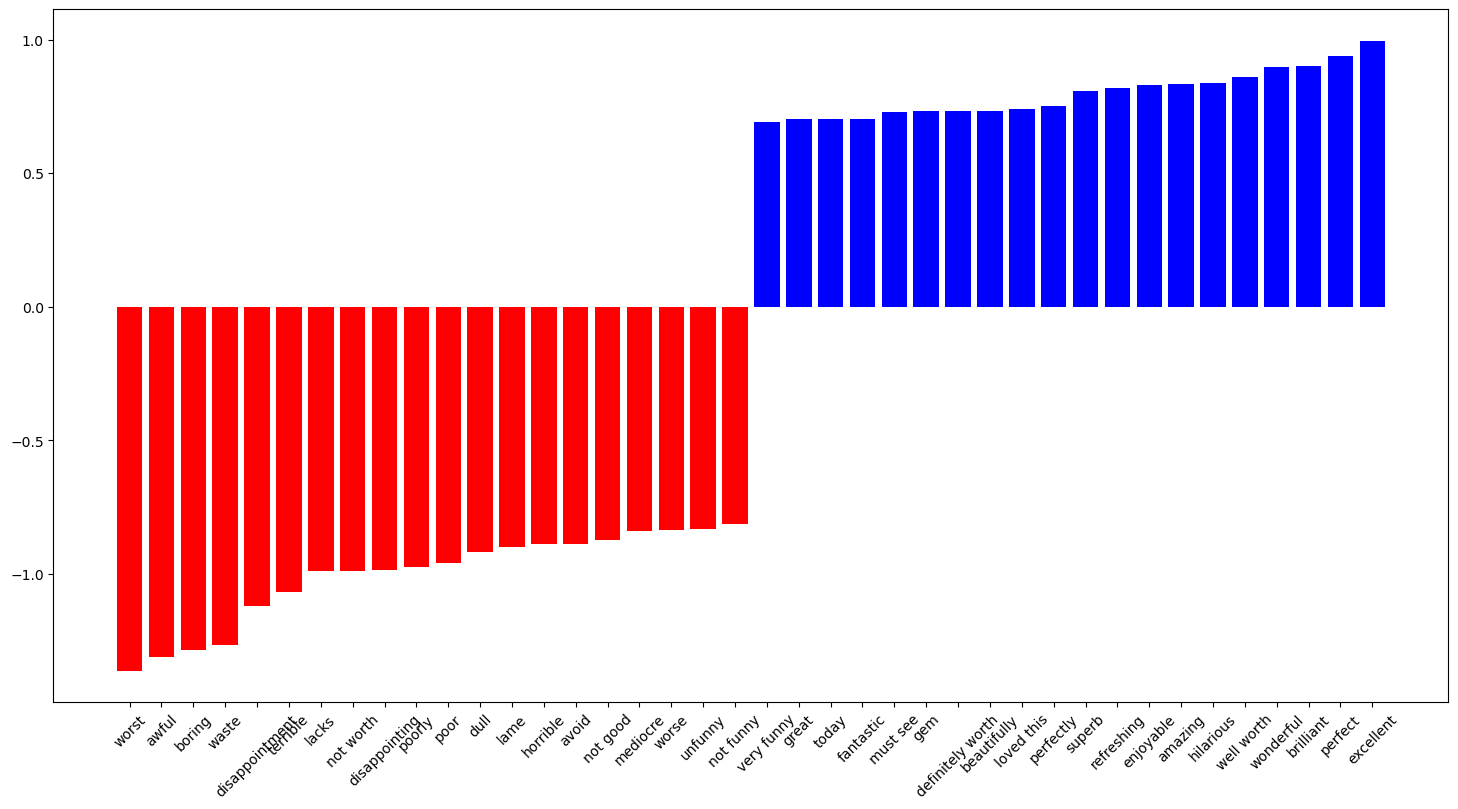

In [149]:
top_features = 20

plt.figure(figsize=(18, 9))
plt.bar(range(top_features), sorted_coefficients['Coefficient'][:top_features], color='red', label='Negative')
plt.bar(range(top_features, top_features*2), sorted_coefficients['Coefficient'][-top_features:], color='blue', label='Positive')

plt.xticks(range(top_features*2), 
           sorted_coefficients['Feature'][:top_features].tolist() + sorted_coefficients['Feature'][-top_features:].tolist(), 
           rotation=45)
plt.show()

In [150]:
dev_text, test_text, dev_y, test_y = train_test_split(reviews, sentiment, test_size=0.2, random_state=42)
print(dev_y.value_counts())
print('-----------------------')
print(test_y.value_counts())
vector = CountVectorizer(ngram_range=(1,4), min_df=4, 
                         stop_words='english')
dev_X = vector.fit_transform(dev_text)
test_X = vector.transform(test_text)
lr = LogisticRegressionCV(max_iter=2000).fit(dev_X, dev_y)
lr.score(test_X, test_y)

negative    20039
positive    19961
Name: sentiment, dtype: int64
-----------------------
positive    5039
negative    4961
Name: sentiment, dtype: int64


0.896

In [151]:
feature_names = vector.get_feature_names_out()
feature_coef = lr.coef_[0]
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': feature_coef})
sorted_coefficients = coefficients_df.sort_values(by='Coefficient',)

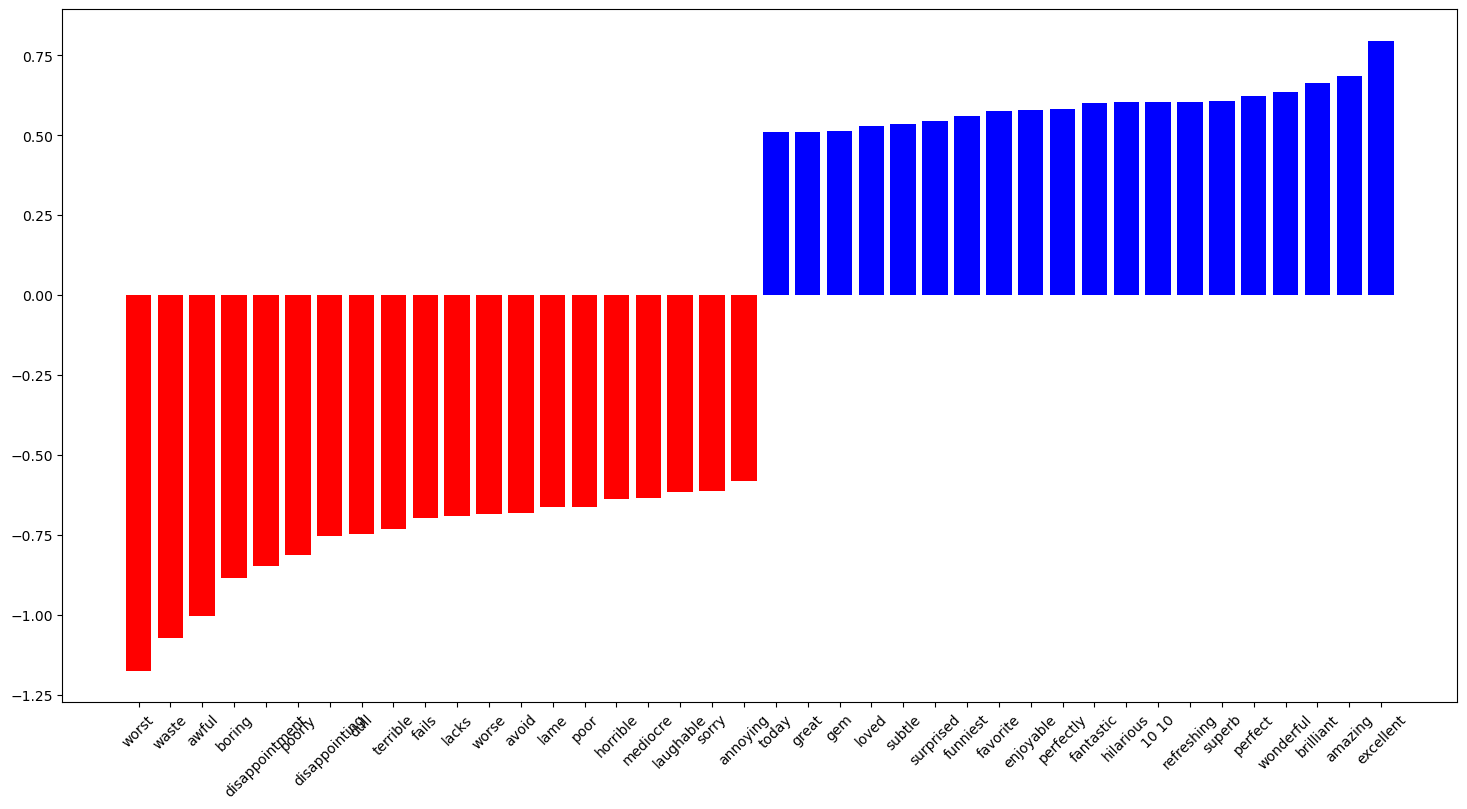

In [152]:
top_features = 20

plt.figure(figsize=(18, 9))
plt.bar(range(top_features), sorted_coefficients['Coefficient'][:top_features], color='red', label='Negative')
plt.bar(range(top_features, top_features*2), sorted_coefficients['Coefficient'][-top_features:], color='blue', label='Positive')

plt.xticks(range(top_features*2), 
           sorted_coefficients['Feature'][:top_features].tolist() + sorted_coefficients['Feature'][-top_features:].tolist(), 
           rotation=45)
plt.show()

# Working With Text Data - Large Scale Tokenization

In [ ]:
dev_text, test_text, dev_y, test_y = train_test_split(reviews, sentiment, test_size=0.2, random_state=42)
print(dev_y.value_counts())
print('-----------------------')
print(test_y.value_counts())
hv = HashingVectorizer()
dev_X = hv.fit_transform(dev_text)
test_X = hv.transform(test_text)
lr = LogisticRegressionCV(max_iter=2000).fit(dev_X, dev_y)
lr.score(test_X, test_y)

In [ ]:
dev_X.shape

# Topic Models - Latent Semantic Analysis (LSA)

In [35]:
vector = CountVectorizer(stop_words="english", min_df=4)
dev_X = vector.fit_transform(dev_text)
test_X = vector.transform(test_text)
dev_X.shape

(40000, 37392)

In [36]:
lsa = TruncatedSVD(n_components=100)
X_lsa = lsa.fit_transform(dev_X)
print(lsa.components_.shape)
print(X_lsa.shape)

(100, 37392)
(40000, 100)


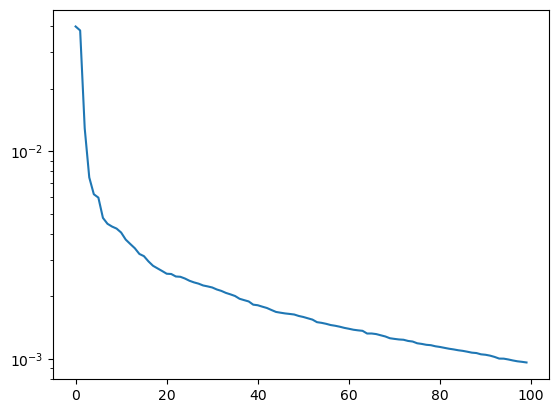

In [24]:
plt.semilogy(lsa.explained_variance_ratio_)
plt.show()

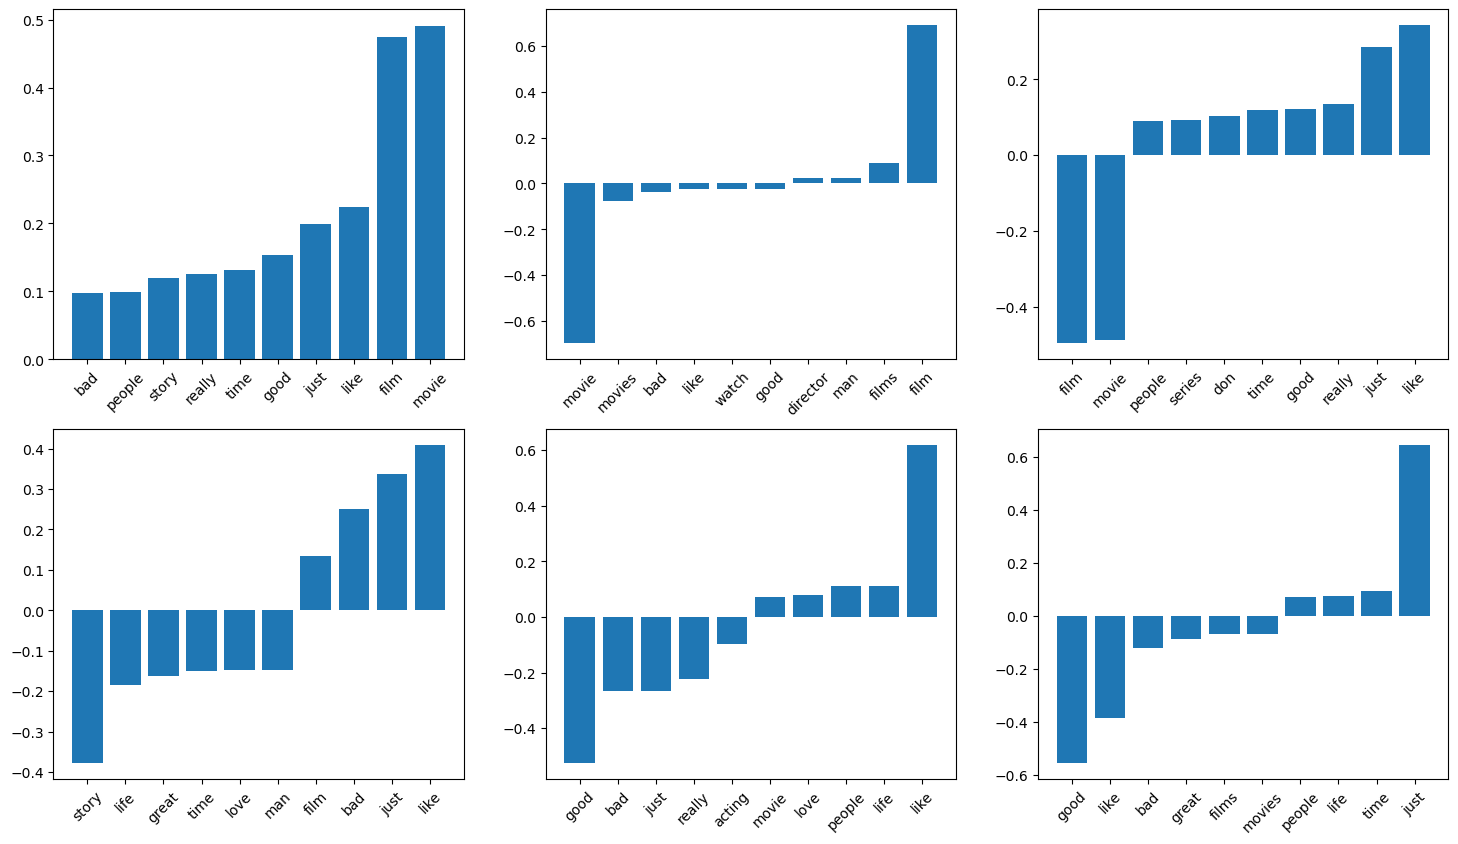

In [55]:
feature_names = vector.get_feature_names_out()
components_df = pd.DataFrame(lsa.components_, columns=feature_names).T.drop(range(6,100), axis=1)

top_features = 10

fig, axes=plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

for i in range(6):
    plt.subplot(2,3,i+1)
    sorted_components_df = components_df.sort_values(by=i, key=abs, ascending=False)[:top_features]
    sorted_components_df = sorted_components_df.sort_values(by=i, ascending=True)
    plt.bar(sorted_components_df.index, sorted_components_df[i],)
    plt.xticks(rotation=45)

In [37]:
scaler = MaxAbsScaler()
dev_X_scaled = scaler.fit_transform(dev_X)
# test_X_scaled = scaler.fit(test_X)

lsa_scaled = TruncatedSVD(n_components=100)
dev_X_lsa_scaled = lsa_scaled.fit_transform(dev_X_scaled)
# test_X_lsa_scaled = lsa_scaled.fit(test_X_scaled)

print(lsa_scaled.components_.shape)
print(dev_X_lsa_scaled.shape)


(100, 37392)
(40000, 100)


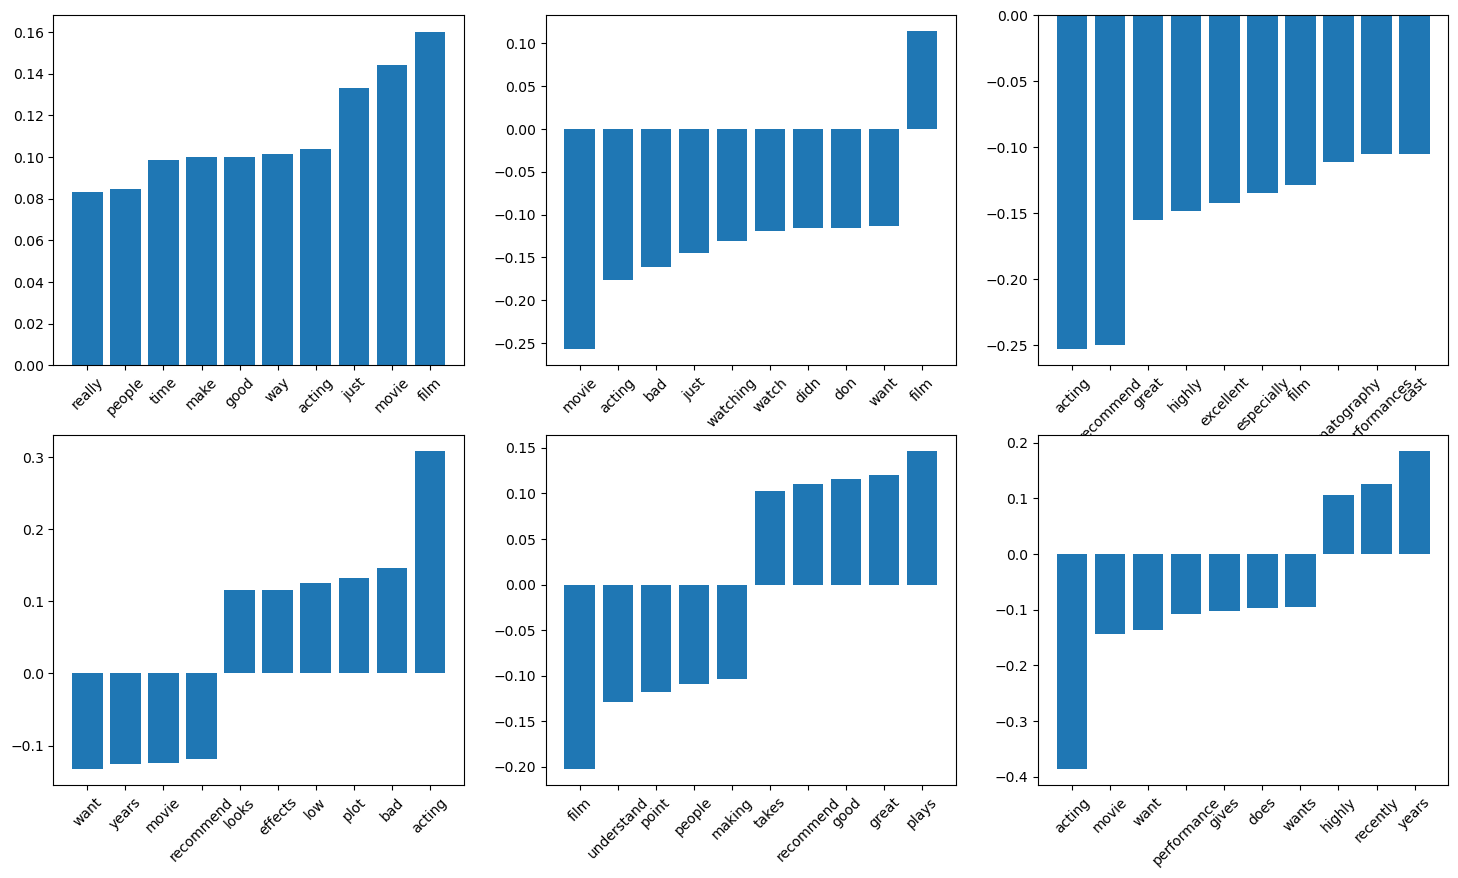

In [38]:
feature_names = vector.get_feature_names_out()
components_df = pd.DataFrame(lsa_scaled.components_, columns=feature_names).T.drop(range(6,100), axis=1)

top_features = 10

fig, axes=plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

for i in range(6):
    plt.subplot(2,3,i+1)
    sorted_components_df = components_df.sort_values(by=i, key=abs, ascending=False)[:top_features]
    sorted_components_df = sorted_components_df.sort_values(by=i, ascending=True)
    plt.bar(sorted_components_df.index, sorted_components_df[i],)
    plt.xticks(rotation=45)

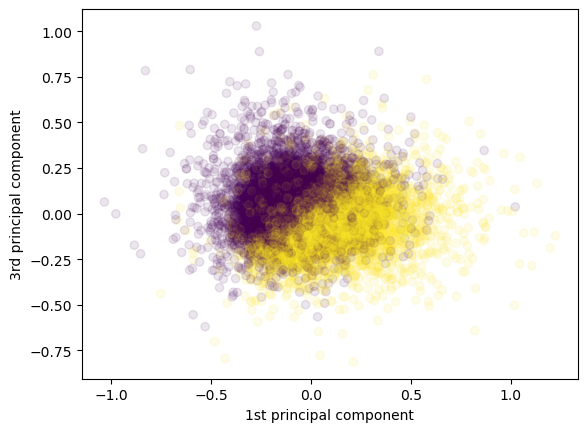

In [42]:
dev_y_int = [1 if item=='positive' else -1 for item in dev_y ]
plt.scatter(dev_X_lsa_scaled[:, 1], dev_X_lsa_scaled[:, 3], alpha=.1, c=dev_y_int)
plt.xlabel('1st principal component')
plt.ylabel('3rd principal component')
plt.show()

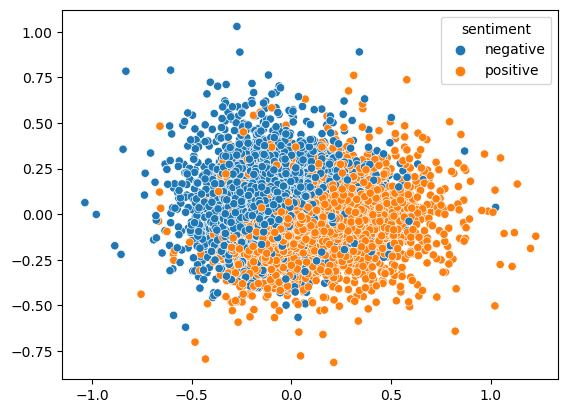

In [44]:
sns.scatterplot(x=dev_X_lsa_scaled[:, 1], y=dev_X_lsa_scaled[:, 3], hue=dev_y)
plt.show()

# Non-Matrix Factorization (NMF)

## Without Scale

In [45]:
nmf = NMF(n_components=100, verbose=10, tol=0.01)
nmf.fit(dev_X)

violation: 1.0
violation: 0.21081784932527717
violation: 0.18432197995758604
violation: 0.15072281143392074
violation: 0.1096233775321268
violation: 0.08182779497035501
violation: 0.06590541400354513
violation: 0.05545646364537744
violation: 0.04457207548584263
violation: 0.032925165090645
violation: 0.02499892035462269
violation: 0.020461153516831945
violation: 0.017669252160867805
violation: 0.015709000899803618
violation: 0.013362670729895358
violation: 0.010429968353570367
violation: 0.008379646031108447
Converged at iteration 18


NMF(n_components=100, tol=0.01, verbose=10)

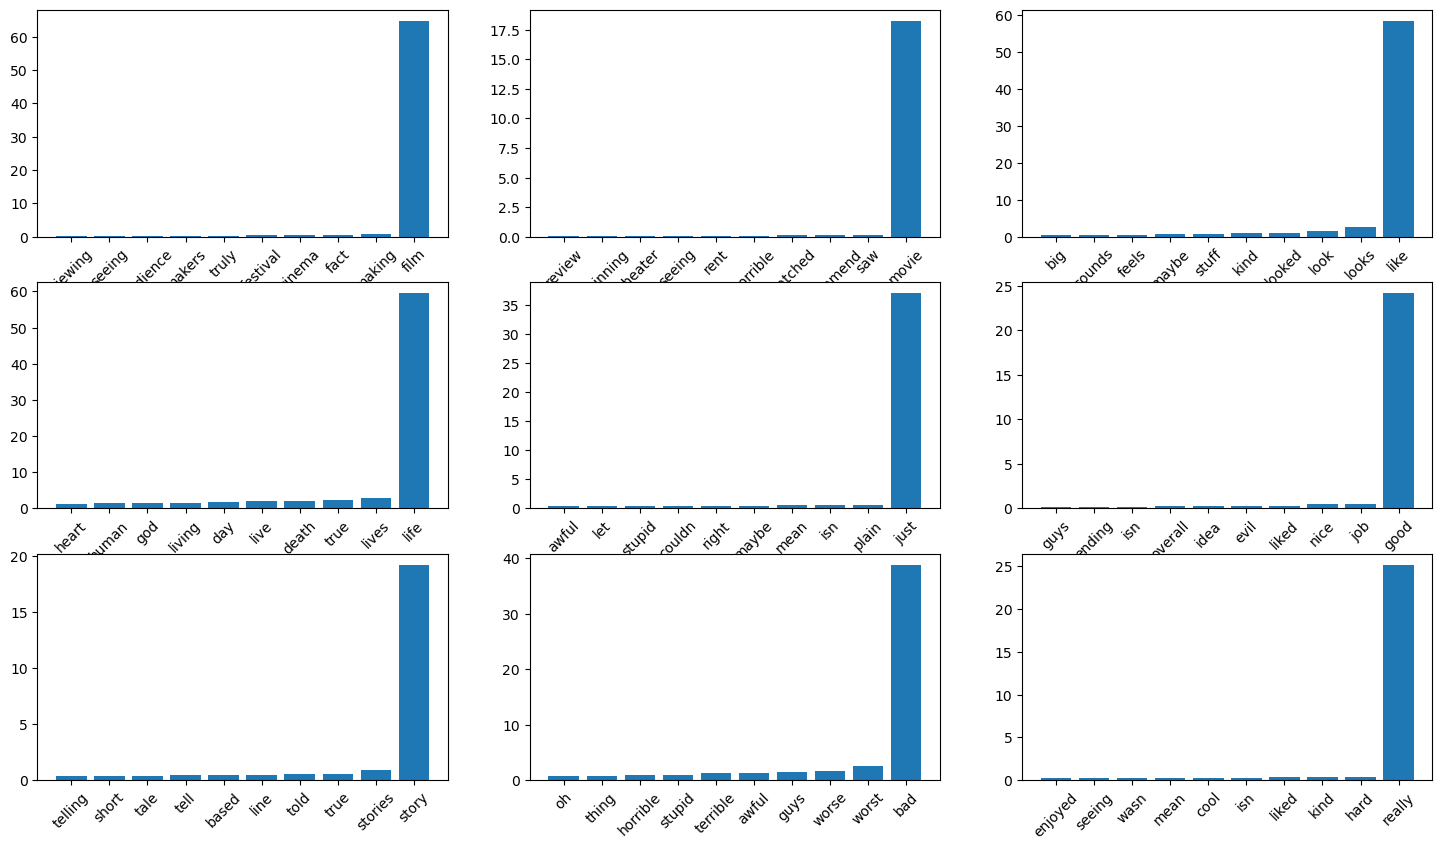

In [46]:
feature_names = vector.get_feature_names_out()
components_df = pd.DataFrame(nmf.components_, columns=feature_names).T.drop(range(9,100), axis=1)

top_features = 10

fig, axes=plt.subplots(nrows=3, ncols=3, figsize=(18, 10))

for i in range(9):
    plt.subplot(3,3,i+1)
    sorted_components_df = components_df.sort_values(by=i, key=abs, ascending=False)[:top_features]
    sorted_components_df = sorted_components_df.sort_values(by=i, ascending=True)
    plt.bar(sorted_components_df.index, sorted_components_df[i],)
    plt.xticks(rotation=45)

## With Scale

In [47]:
nmf_scale = NMF(n_components=100, verbose=10, tol=0.01)
nmf_scale.fit(dev_X_scaled)

violation: 1.0
violation: 0.21816205551758985
violation: 0.23465182000758553
violation: 0.17402408819939222
violation: 0.1472773100102926
violation: 0.12385307395838041
violation: 0.1032983232794313
violation: 0.08569138432782196
violation: 0.0721008985437707
violation: 0.061923002831965376
violation: 0.05427951930917258
violation: 0.04852749103838256
violation: 0.04452943727583388
violation: 0.04202093581373443
violation: 0.04093261013435949
violation: 0.04054849206320237
violation: 0.04117494753869207
violation: 0.04136370214771833
violation: 0.04071250503220241
violation: 0.03943629129225567
violation: 0.037392718530862276
violation: 0.03433979574495585
violation: 0.030481825106767335
violation: 0.02651805660099163
violation: 0.022563227461867893
violation: 0.01868906290857889
violation: 0.015081326049741542
violation: 0.01206407058895705
violation: 0.010050060548606582
violation: 0.008536460976900542
Converged at iteration 31


NMF(n_components=100, tol=0.01, verbose=10)

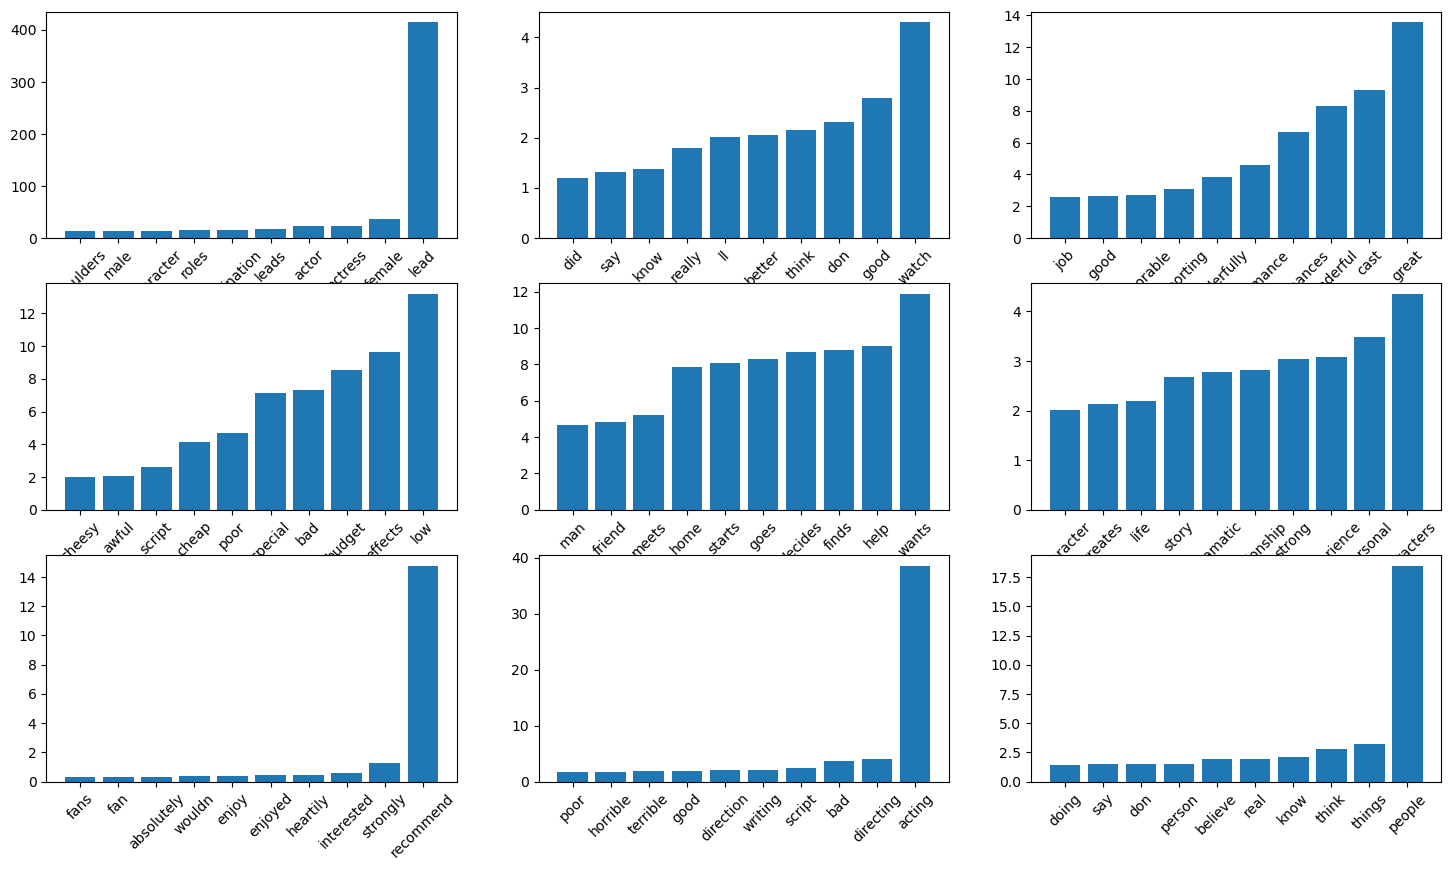

In [48]:
feature_names = vector.get_feature_names_out()
components_df = pd.DataFrame(nmf_scale.components_, columns=feature_names).T.drop(range(9,100), axis=1)

top_features = 10

fig, axes=plt.subplots(nrows=3, ncols=3, figsize=(18, 10))

for i in range(9):
    plt.subplot(3,3,i+1)
    sorted_components_df = components_df.sort_values(by=i, key=abs, ascending=False)[:top_features]
    sorted_components_df = sorted_components_df.sort_values(by=i, ascending=True)
    plt.bar(sorted_components_df.index, sorted_components_df[i],)
    plt.xticks(rotation=45)

## With TF-IDF

In [49]:
vector = TfidfVectorizer()
dev_X = vector.fit_transform(dev_text)

nmf_TF_IDF = NMF(n_components=100, verbose=10, tol=0.01)
nmf_TF_IDF.fit(dev_X)

violation: 1.0
violation: 0.26122590061201795
violation: 0.1610781528744815
violation: 0.16532013527038594
violation: 0.16258865694954155
violation: 0.14932911559082068
violation: 0.12941394159887182
violation: 0.10812997007131522
violation: 0.08771469807577287
violation: 0.07281136904677281
violation: 0.06149106206680063
violation: 0.05213987963641756
violation: 0.044303507572401646
violation: 0.03815626319300619
violation: 0.033552976481297986
violation: 0.029910814599292797
violation: 0.026975538964848167
violation: 0.02505778888093416
violation: 0.023557407998770548
violation: 0.022221201344836513
violation: 0.021074925275919358
violation: 0.019831248211724217
violation: 0.018441206058189278
violation: 0.01708663022562455
violation: 0.015812262818369217
violation: 0.014699039701195021
violation: 0.013641516916254667
violation: 0.01272537831787369
violation: 0.011858207771399582
violation: 0.01107401926196761
violation: 0.010316701472826094
violation: 0.009614478350904333
Converged 

NMF(n_components=100, tol=0.01, verbose=10)

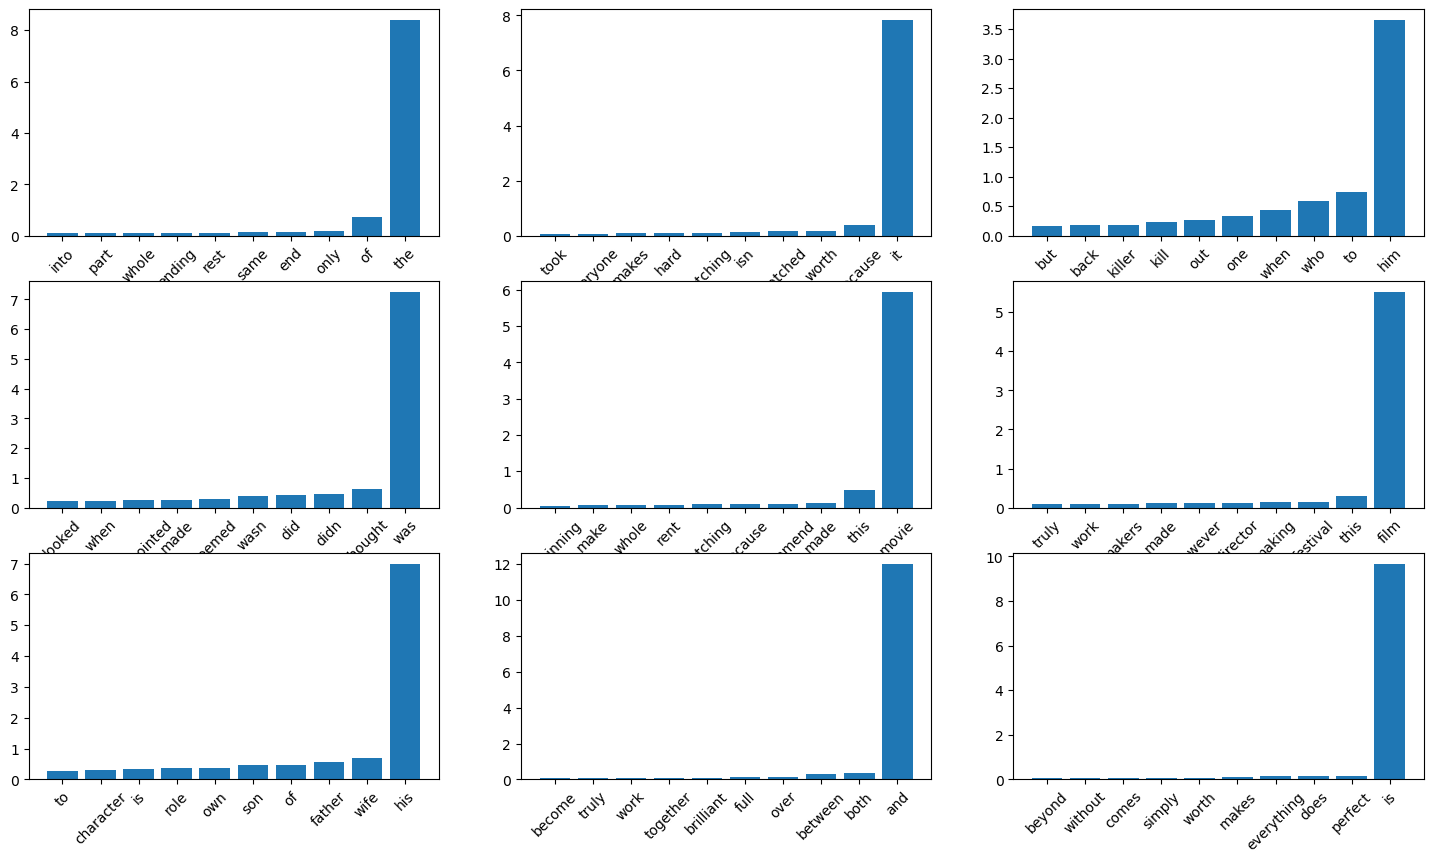

In [50]:
feature_names = vector.get_feature_names_out()
components_df = pd.DataFrame(nmf_TF_IDF.components_, columns=feature_names).T.drop(range(9,100), axis=1)

top_features = 10

fig, axes=plt.subplots(nrows=3, ncols=3, figsize=(18, 10))

for i in range(9):
    plt.subplot(3,3,i+1)
    sorted_components_df = components_df.sort_values(by=i, key=abs, ascending=False)[:top_features]
    sorted_components_df = sorted_components_df.sort_values(by=i, ascending=True)
    plt.bar(sorted_components_df.index, sorted_components_df[i],)
    plt.xticks(rotation=45)

# Latent Dirichlet Allocation (LDA)

In [52]:
lda = LatentDirichletAllocation(n_components=10, learning_method="batch")
X_lda = lda.fit_transform(dev_X)

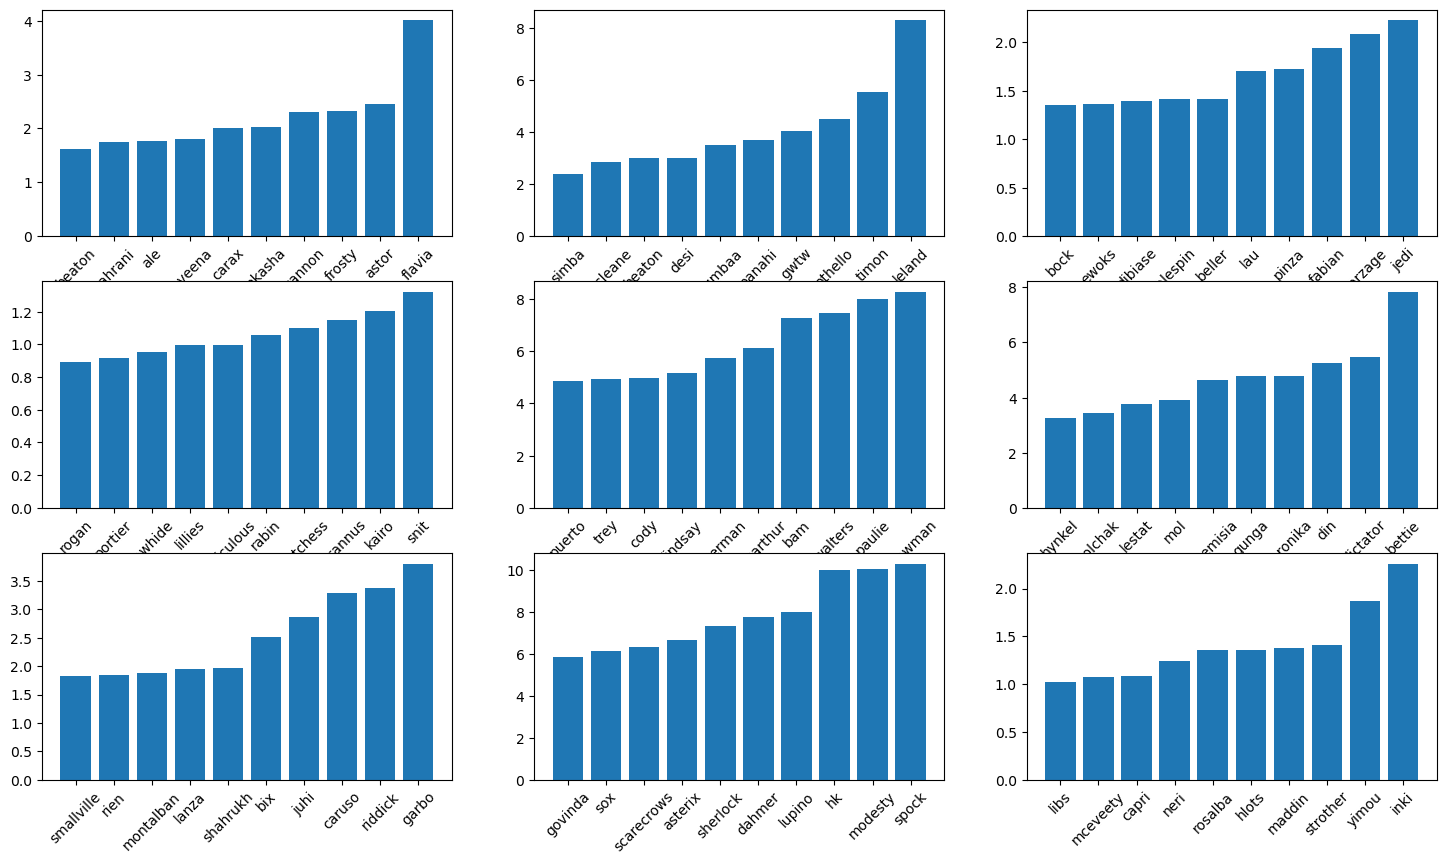

In [59]:
feature_names = vector.get_feature_names_out()
components_df = pd.DataFrame(lda.components_, columns=feature_names).T

top_features = 10

fig, axes=plt.subplots(nrows=3, ncols=3, figsize=(18, 10))

for i in range(9):
    plt.subplot(3,3,i+1)
    sorted_components_df = components_df.sort_values(by=i, key=abs, ascending=False)[:top_features]
    sorted_components_df = sorted_components_df.sort_values(by=i, ascending=True)
    plt.bar(sorted_components_df.index, sorted_components_df[i],)
    plt.xticks(rotation=45)

In [60]:
lda100 = LatentDirichletAllocation(n_components=10, learning_method="batch")
X_lda = lda100.fit_transform(dev_X)

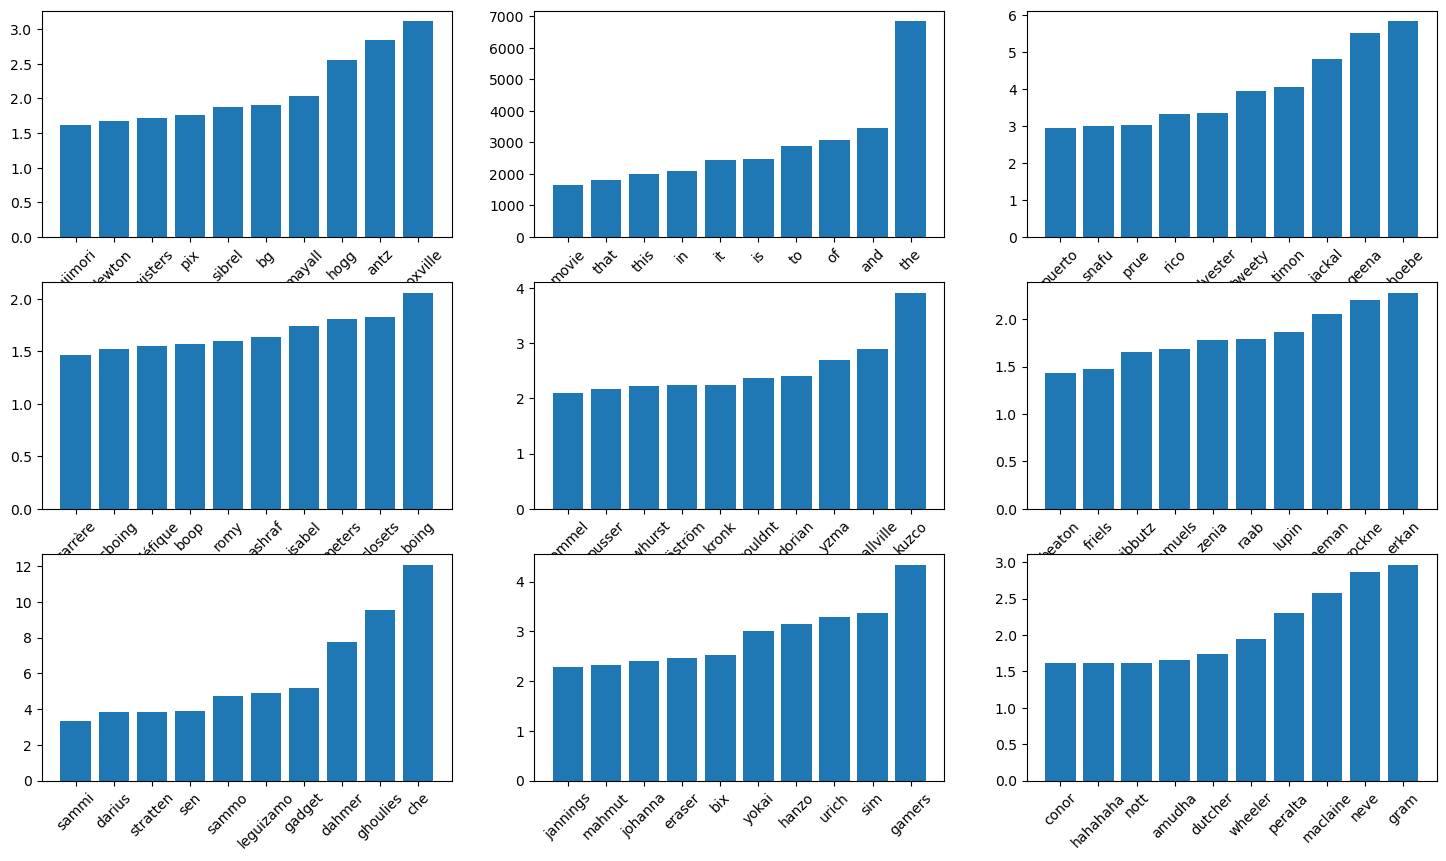

In [61]:
feature_names = vector.get_feature_names_out()
components_df = pd.DataFrame(lda100.components_, columns=feature_names).T

top_features = 10

fig, axes=plt.subplots(nrows=3, ncols=3, figsize=(18, 10))

for i in range(9):
    plt.subplot(3,3,i+1)
    sorted_components_df = components_df.sort_values(by=i, key=abs, ascending=False)[:top_features]
    sorted_components_df = sorted_components_df.sort_values(by=i, ascending=True)
    plt.bar(sorted_components_df.index, sorted_components_df[i],)
    plt.xticks(rotation=45)